In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM, Activation
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import librosa

Using TensorFlow backend.


In [3]:
path = "./data/"

MFCC's represent distinct units of sound or phonemes as the shape of the vocal tract

In [24]:
import numpy as np
max_len = 11
labels = os.listdir(path)
for label in labels:
    mfcc_vectors = []
    wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
    for wavfile in wavfiles:
        wav, _ = librosa.load(wavfile, mono=True, sr = None)
        wav = np.asfortranarray(wav[::3])
        mfcc = librosa.feature.mfcc(wav, sr=22050, n_mfcc=40)
        if (max_len > mfcc.shape[1]):
            pad_width = max_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_len]
        mfcc_vectors.append(mfcc)
    np.save(label + '.npy', mfcc_vectors)

In [5]:
labels

['cat', 'bird', 'happy']

In [6]:
label_indices = np.arange(0, len(labels))
label_indices

array([0, 1, 2])

In [25]:
X = np.load(labels[0] + '.npy')
y = np.zeros(X.shape[0])

for i, label in enumerate(labels[1:]):
    x = np.load(label + '.npy')
    X = np.vstack((X, x))
    y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

assert X.shape[0] == len(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, shuffle=True)

In [50]:
X.shape

(5206, 40, 11)

In [27]:
y.shape

(5206,)

In [10]:
X_train.shape[0]

3644

In [28]:
X_train = X_train.reshape(X_train.shape[0], 40, 11, 1)
X_test = X_test.reshape(X_test.shape[0], 40, 11, 1)
X_train.shape

(3644, 40, 11, 1)

0.0


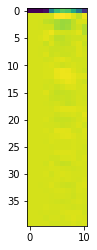

In [29]:
plt.imshow(X_train[105, :, :, 0])
print(y_train[105])

In [30]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [31]:
model = Sequential()
model.add(Conv2D(12, kernel_size=3, input_shape=(40,11,1), activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 38, 9, 12)         120       
_________________________________________________________________
flatten_3 (Flatten)          (None, 4104)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 12315     
Total params: 12,435
Trainable params: 12,435
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [33]:
model.fit(X_train, y_train, epochs = 2, validation_data=(X_test, y_test))

Train on 3644 samples, validate on 1562 samples
Epoch 1/2
3644/3644 [==============================] - 6s 2ms/step - loss: 1.1908 - accuracy: 0.8002 - val_loss: 0.6513 - val_accuracy: 0.8611
Epoch 2/2
3644/3644 [==============================] - 5s 1ms/step - loss: 0.3843 - accuracy: 0.9059 - val_loss: 0.5636 - val_accuracy: 0.8784


In [37]:
model = Sequential()
model.add(Conv2D(64,activation='relu',kernel_size=3,input_shape=(40,11,1),padding='same')) #input_shape does not include batch_size
model.add(Conv2D(64,activation='relu',kernel_size=3,padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,activation='relu',kernel_size=3,padding='same'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 40, 11, 64)        640       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 40, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 5, 64)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 5, 16)         9232      
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [38]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [40]:
model.fit(X_train, y_train, epochs = 6, validation_data=(X_test, y_test))

Train on 3644 samples, validate on 1562 samples
Epoch 1/6
3644/3644 [==============================] - 10s 3ms/step - loss: 0.0911 - accuracy: 0.9701 - val_loss: 0.1549 - val_accuracy: 0.9513
Epoch 2/6
3644/3644 [==============================] - 11s 3ms/step - loss: 0.0713 - accuracy: 0.9759 - val_loss: 0.2004 - val_accuracy: 0.9373
Epoch 3/6
3644/3644 [==============================] - 11s 3ms/step - loss: 0.0945 - accuracy: 0.9668 - val_loss: 0.1207 - val_accuracy: 0.9622
Epoch 4/6
3644/3644 [==============================] - 10s 3ms/step - loss: 0.0618 - accuracy: 0.9761 - val_loss: 0.1576 - val_accuracy: 0.9590
Epoch 5/6
3644/3644 [==============================] - 11s 3ms/step - loss: 0.0361 - accuracy: 0.9882 - val_loss: 0.1177 - val_accuracy: 0.9635
Epoch 6/6
3644/3644 [==============================] - 11s 3ms/step - loss: 0.0415 - accuracy: 0.9852 - val_loss: 0.1530 - val_accuracy: 0.9635


In [41]:
X_train = X_train.reshape(X_train.shape[0], 40, 11)
X_test = X_test.reshape(X_test.shape[0], 40, 11)
X_train.shape

(3644, 40, 11)

In [42]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(40, 11)))
model.add(LSTM(128))
model.add(Dense(10))
model.add(Dense(3, activation='softmax'))

In [43]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [44]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 3644 samples, validate on 1562 samples
Epoch 1/10
3644/3644 [==============================] - 50s 14ms/step - loss: 0.9717 - accuracy: 0.5058 - val_loss: 0.8724 - val_accuracy: 0.5992
Epoch 2/10
3644/3644 [==============================] - 47s 13ms/step - loss: 0.7640 - accuracy: 0.6641 - val_loss: 0.7287 - val_accuracy: 0.6889
Epoch 3/10
3644/3644 [==============================] - 46s 13ms/step - loss: 0.5989 - accuracy: 0.7610 - val_loss: 0.6722 - val_accuracy: 0.7273
Epoch 4/10
3644/3644 [==============================] - 45s 12ms/step - loss: 0.4864 - accuracy: 0.8071 - val_loss: 0.6330 - val_accuracy: 0.7497
Epoch 5/10
3644/3644 [==============================] - 47s 13ms/step - loss: 0.3990 - accuracy: 0.8513 - val_loss: 0.6824 - val_accuracy: 0.7420
Epoch 6/10
3644/3644 [==============================] - 47s 13ms/step - loss: 0.3067 - accuracy: 0.8878 - val_loss: 0.6171 - val_accuracy: 0.7849
Epoch 7/10
3644/3644 [==============================] - 44s 12ms/step - loss

In [45]:
pred = model.predict(X_train[0].reshape(1,40,11))
pred.argmax()

2

In [46]:
y_train[0]

array([0., 0., 1.], dtype=float32)

### Using SpeechRecognition api

In [47]:
import speech_recognition as sr
r = sr.Recognizer()
bird = sr.AudioFile('bird.wav')
with bird as source:
    audio = r.record(source)
type(audio)

speech_recognition.AudioData

In [48]:
r.recognize_google(audio)

'Bird'